# Testing the model

### Importing Libraries

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5") #loading the model for testing
path = "test/2/0.jpg"

2023-02-20 11:09:24.828390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 11:09:25.000987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 11:09:25.001015: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 11:09:25.746085: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Plotting the image

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


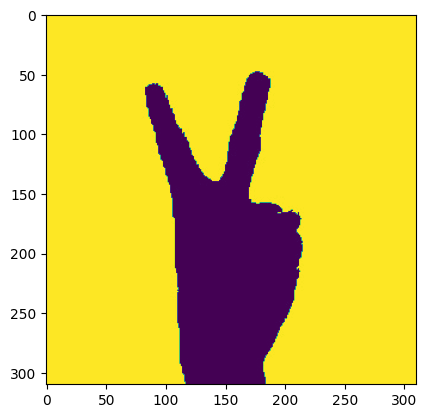

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [4]:
#loading of the image
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [5]:
type(x)

numpy.ndarray

In [6]:
#changing the shape
x = np.expand_dims(x,axis = 0)

In [7]:
x.shape

(1, 64, 64, 1)

### Predicting our results

In [18]:
# pred = model.predict(x) #predicting the classes
# pred = (model.predict(x) > 0.5).astype("int")
pred = np.argmax(model.predict(x), axis=-1)


1/1 [==============================] - 0s 26ms/step


In [19]:
index=['0','1','2','3','4','5']
result=str(index[pred[0]])
result

'2'

In [24]:
import numpy as np
p = []

for i in range(0,6):
    for j in range(0,5):
        path = f"test/{str(i)}/{str(j)}.jpg"
        img = image.load_img(path,color_mode = "grayscale",target_size= (64,64))
        x = image.img_to_array(img)
        x = np.expand_dims(x,axis = 0)
        pred = np.argmax(model.predict(x), axis=-1)
        p.append(pred)

print(p)

1/1 [==============================] - 0s 20ms/step
[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([4]), array([3]), array([3]), array([3]), array([3]), array([4]), array([4]), array([4]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5])]


In [25]:
result = []
index=['0','1','2','3','4','5']
for i in p:
    result.append(index[i[0]])
    
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '4', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']
